In [6]:
import os
import matplotlib.pyplot as plt
from OA_utils.OAPreprocessingScripts import *
from OA_utils.OpenSimScripts import *
from OA_utils.data_utils import interp_segments, ad2float
import pickle
from collections import Counter

In [7]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
subjects = [f'Y{i}' for i in range(1, 23)]
bad_subjects = ['Y3']
for bs in bad_subjects:
    subjects.remove(bs)
speeds = ['80', '100', '120']
n_trials = 5
subject_trials = {}
trial_names = []
for subj in subjects:
    subj_dir = os.path.join(root_dir, subj, 'Walking/Files_W_HJCs/')
    output_dir = os.path.join(root_dir, 'transformed/')
    # Initialize nested dict
    subject_trials[subj] = {
        'static': {
            'input': os.path.join(subj_dir, f'{subj}_walking_static1.trc'),
            'output': os.path.join(output_dir, f'{subj}_walk_static1_transformed.trc')
        },
        'tracking': [],
        'forces': [],
        
    }
    # Populate tracking and force trial lists
    for spd in speeds:
        for i in range(1, n_trials + 1):
            trial_name = f'{subj}_{spd}_{i}'
            trial_names.append(str(trial_name))
            tracking_in = os.path.join(subj_dir, f'{trial_name}.trc')
            tracking_out = os.path.join(output_dir, f'{trial_name}_transformed.trc')
            force_in = os.path.join(subj_dir, f'{trial_name}.forces')
            force_out = os.path.join(output_dir, f'{trial_name}_transformed.mot')

            subject_trials[subj]['tracking'].append({'input': tracking_in, 'output': tracking_out})
            subject_trials[subj]['forces'].append({'input': force_in, 'output': force_out})

all_segs = {}
for subj, data in subject_trials.items():
    process_hjc_trc(input_path=data['static']['input'], 
                    output_path=data['static']['output'], 
                    markers_to_drop=[])
    for trc, forces in zip(data['tracking'], data['forces']):
        trial_segs = preprocess_trc_grf(trc_ip=trc['input'], 
                           trc_op=trc['output'],
                           markers_to_drop=[], 
                           grf_ip=forces['input'], 
                           grf_op=forces['output'],
                           grf_pickle_path='')
        for trial_name, seg_dict in trial_segs.items():
            subj_name = trial_name.split('_')[0]  
            if subj_name not in all_segs:
                all_segs[subj_name] = {}
            all_segs[subj_name][trial_name] = seg_dict
print(all_segs)

<bound method NDFrame.head of 0      0.153436
1      0.153430
2      0.153424
3      0.153417
4      0.153411
         ...   
291    0.153423
292    0.153428
293    0.153432
294    0.153434
295    0.153436
Name: X28, Length: 296, dtype: float64>
<bound method NDFrame.head of 0      0.149995
1      0.149973
2      0.149954
3      0.149940
4      0.149932
         ...   
291    0.149909
292    0.149904
293    0.149895
294    0.149884
295    0.149874
Name: X39, Length: 296, dtype: float64>
<bound method NDFrame.head of 0     -1.997006
1     -1.996464
2     -1.995915
3     -1.994848
4     -1.994460
         ...   
350    1.991450
351    2.001129
352    2.008752
353    2.014109
354    2.018189
Name: X28, Length: 355, dtype: float64>
<bound method NDFrame.head of 0     -1.416639
1     -1.399865
2     -1.385405
3     -1.373220
4     -1.363135
         ...   
350    1.401157
351    1.401343
352    1.402671
353    1.403192
354    1.404060
Name: X39, Length: 355, dtype: float64>
<bound method ND

In [ ]:
subj_masses = [63, 85, 54, 60, 54, 83, 53, 62, 72, 65, 84, 83, 64, 59, 55, 73, 90, 75, 65, 68]
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
for subj, data in subject_trials.items():
    scale_generic(root_dir= root_dir, mass=subj_masses[i], static_pose_filename=data['static']['output'])

[info] Processing subject Y1_scaled...
[info] Step 1: Loading generic model
[info] Updating Model file from 40000 to latest format...
[info] Loaded model RajagopalModifiedGeneric from file /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Models/RajagopalModified_generic.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'

In [7]:
parsed = parse_combined_scaling_output('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Y_scaling_log.txt')
for subject, info in parsed.items():
    rms = info['marker_error_rms']
    max = info['marker_error_max']
    marker = info['marker_error_max_marker']
    print(f'{subject} had marker error rms {rms} and max marker error {max} at the {marker} marker')

Read scaling log
Y1 had marker error rms 0.0209464 and max marker error 0.0353988 at the R.ASIS marker
Y2 had marker error rms 0.017833 and max marker error 0.030939 at the L.ASIS marker
Y4 had marker error rms 0.0158646 and max marker error 0.024268 at the R.Knee marker
Y5 had marker error rms 0.0191026 and max marker error 0.0352803 at the R.Knee marker
Y6 had marker error rms 0.0131734 and max marker error 0.0220867 at the L.Knee marker
Y7 had marker error rms 0.0169768 and max marker error 0.0366843 at the L.Knee marker
Y8 had marker error rms 0.0178472 and max marker error 0.0292494 at the L.ASIS marker
Y9 had marker error rms 0.0164671 and max marker error 0.0326594 at the R.Knee marker
Y10 had marker error rms 0.0172277 and max marker error 0.0365453 at the L.Knee marker
Y11 had marker error rms 0.0159794 and max marker error 0.0285476 at the L.ASIS marker
Y12 had marker error rms 0.0222344 and max marker error 0.0397617 at the R.Heel marker
Y13 had marker error rms 0.0139774 an

In [25]:
ik_df = parse_full_ik_log('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Y_ik_log.txt', trial_names)
abs_max_count, mean_max_count, mean_rms_count = 0, 0 ,0
problem_trials = []
for idx, row in ik_df.iterrows():
    trial = row['trial_name']
    mean_rms = row['mean_rms']
    std_rms = row['std_rms']
    max_rms = row['max_rms']
    mean_max = row['mean_max']
    std_max = row['std_max']
    max_error = row['max_marker_error']
    max_error_marker = row['max_marker_name']
    #print(f'{trial} had mean rms {mean_rms}, std rms {std_rms}, and max rms{max_rms}. The average max error was{mean_max}, with a standard deviation {std_max} and overall max {max_error} at the marker {max_error_marker}')
    if mean_rms > 0.03:
        #print(f'{trial} had mean RMS greater than 3 cm, it was {mean_rms}')
        mean_rms_count += 1
        problem_trials.append(trial)
    elif mean_max > 0.04:
        #print(f'{trial} had mean max error greater than 4 cm, it was {mean_max}')
        mean_max_count += 1
        problem_trials.append(trial)
    # elif max_error > 0.05:
    #     abs_max_count += 1
    #     print(f'{trial} had max_error greater than 6 cm, it was {max_error} at the {max_error_marker} marker')
    #     problem_trials.append(trial)
print(f'{mean_rms_count} trials with Mean RMS > 3 cm')
print(f'{mean_max_count} trials with Mean max error > 4 cm')
print(f'{abs_max_count} trials with overall max error > 6 cm')




Read inverse kinematics log
14 trials with Mean RMS > 3 cm
3 trials with Mean max error > 4 cm
0 trials with overall max error > 6 cm


In [3]:
root_dir = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/'
os.chdir(root_dir)
for subj, data in subject_trials.items():
    model = osim.Model(f'Results/Scaling/{subj}_scaled.osim')
    for trc, forces in zip(data['tracking'], data['forces']):
        inverse_dynamics(root_dir=root_dir, force_data_filepath=forces['output'], tracking_data_filepath=trc['output'], model=model)

[info] Loaded model Y1_scaled from file Results/Scaling/Y1_scaled.osim
[warning] Couldn't find file 'r_pelvis.vtp'.
[warning] Couldn't find file 'l_pelvis.vtp'.
[warning] Couldn't find file 'sacrum.vtp'.
[warning] Couldn't find file 'r_femur.vtp'.
[warning] Couldn't find file 'r_tibia.vtp'.
[warning] Couldn't find file 'r_fibula.vtp'.
[warning] Couldn't find file 'r_patella.vtp'.
[warning] Couldn't find file 'r_talus.vtp'.
[warning] Couldn't find file 'r_foot.vtp'.
[warning] Couldn't find file 'r_bofoot.vtp'.
[warning] Couldn't find file 'l_femur.vtp'.
[warning] Couldn't find file 'l_tibia.vtp'.
[warning] Couldn't find file 'l_fibula.vtp'.
[warning] Couldn't find file 'l_patella.vtp'.
[warning] Couldn't find file 'l_talus.vtp'.
[warning] Couldn't find file 'l_foot.vtp'.
[warning] Couldn't find file 'l_bofoot.vtp'.
[warning] Couldn't find file 'hat_spine.vtp'.
[warning] Couldn't find file 'hat_jaw.vtp'.
[warning] Couldn't find file 'hat_skull.vtp'.
[warning] Couldn't find file 'hat_ribs

In [4]:
left = 0
right = 0
for subjects, trials in all_segs.items():
    for trial_data in trials.values():
        left += len(trial_data['left'])
        right += len(trial_data['right'])
print(f'{left} total left foot segments')
print(f'{right} total right foot segments')

396 total left foot segments
429 total right foot segments


In [61]:
#initialize arrays to store compiled segments
grf_x_segs = []
grf_y_segs = []
grf_z_segs = []

tibpost_segments = []
tibant_segments = []
edl_segments = []
ehl_segments = []
fdl_segments = []
fhl_segments = []
gaslat_segments = []
gasmed_segments = []
soleus_segments = []
perbrev_segments = []
perlong_segments = []
achilles_segments = []

compiled_segs = {}
problematic_segs = []

#loop thru subjects
    
for subjects, trials in all_segs.items():
    subject = subjects
    if subject not in compiled_segs:
        compiled_segs[subject] = {
        'grf_x': [], 'grf_y': [], 'grf_z': [],
        'tibpost': [], 'tibant': [], 'edl': [], 'ehl': [],
        'fdl': [], 'fhl': [], 'gaslat': [], 'gasmed': [],
        'soleus': [], 'perbrev': [], 'perlong': [], 'achilles': []
        }
    for trial_name, seg_dict in trials.items():
        if trial_name in problem_trials:
            continue
        grf_path = os.path.join('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/transformed/grf_pickles', trial_name)
        grf_df = pd.read_pickle(grf_path)
        muscle_path = os.path.join(f'/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/{trial_name}/results_forces.sto')
        muscle_storage = osim.Storage(muscle_path)

        time = grf_df['time'].values
        muscle_time_col = osim.ArrayDouble()
        tibpost_r_col = osim.ArrayDouble()
        tibant_r_col = osim.ArrayDouble()
        edl_r_col = osim.ArrayDouble()
        ehl_r_col = osim.ArrayDouble()
        fdl_r_col = osim.ArrayDouble()
        fhl_r_col = osim.ArrayDouble()
        gaslat_r_col = osim.ArrayDouble()
        gasmed_r_col = osim.ArrayDouble()
        soleus_r_col = osim.ArrayDouble()
        perbrev_r_col = osim.ArrayDouble()
        perlong_r_col = osim.ArrayDouble()
            
        tibpost_l_col = osim.ArrayDouble()
        tibant_l_col = osim.ArrayDouble()
        edl_l_col = osim.ArrayDouble()
        ehl_l_col = osim.ArrayDouble()
        fdl_l_col = osim.ArrayDouble()
        fhl_l_col = osim.ArrayDouble()
        gaslat_l_col = osim.ArrayDouble()
        gasmed_l_col = osim.ArrayDouble()
        soleus_l_col = osim.ArrayDouble()
        perbrev_l_col = osim.ArrayDouble()
        perlong_l_col = osim.ArrayDouble()

        muscle_storage.getTimeColumn(muscle_time_col)
        muscle_storage.getDataColumn('tibpost_r', tibpost_r_col)
        muscle_storage.getDataColumn('tibant_r', tibant_r_col)
        muscle_storage.getDataColumn('edl_r', edl_r_col)
        muscle_storage.getDataColumn('ehl_r', ehl_r_col)
        muscle_storage.getDataColumn('fdl_r', fdl_r_col)
        muscle_storage.getDataColumn('fhl_r', fhl_r_col)
        muscle_storage.getDataColumn('gaslat_r', gaslat_r_col)
        muscle_storage.getDataColumn('gasmed_r', gasmed_r_col)
        muscle_storage.getDataColumn('soleus_r', soleus_r_col)
        muscle_storage.getDataColumn('perbrev_r', perbrev_r_col)
        muscle_storage.getDataColumn('perlong_r', perlong_r_col)
            
        muscle_storage.getDataColumn('tibpost_l', tibpost_l_col)
        muscle_storage.getDataColumn('tibant_l', tibant_l_col)
        muscle_storage.getDataColumn('edl_l', edl_l_col)
        muscle_storage.getDataColumn('ehl_l', ehl_l_col)
        muscle_storage.getDataColumn('fdl_l', fdl_l_col)
        muscle_storage.getDataColumn('fhl_l', fhl_l_col)
        muscle_storage.getDataColumn('gaslat_l', gaslat_l_col)
        muscle_storage.getDataColumn('gasmed_l', gasmed_l_col)
        muscle_storage.getDataColumn('soleus_l', soleus_l_col)
        muscle_storage.getDataColumn('perbrev_l', perbrev_l_col)
        muscle_storage.getDataColumn('perlong_l', perlong_l_col)
        muscle_time = ad2float(muscle_time_col)
        tibpost_r = ad2float(tibpost_r_col)
        tibant_r = ad2float(tibant_r_col)
        edl_r = ad2float(edl_r_col)
        ehl_r = ad2float(ehl_r_col)
        fdl_r = ad2float(fdl_r_col)
        fhl_r = ad2float(fhl_r_col)
        gaslat_r = ad2float(gaslat_r_col)
        gasmed_r = ad2float(gasmed_r_col)
        soleus_r = ad2float(soleus_r_col)
        perbrev_r = ad2float(perbrev_r_col)
        perlong_r = ad2float(perlong_r_col)
            
        tibpost_l = ad2float(tibpost_l_col)
        tibant_l = ad2float(tibant_l_col)
        edl_l = ad2float(edl_l_col)
        ehl_l = ad2float(ehl_l_col)
        fdl_l = ad2float(fdl_l_col)
        fhl_l = ad2float(fhl_l_col)
        gaslat_l = ad2float(gaslat_l_col)
        gasmed_l = ad2float(gasmed_l_col)
        soleus_l = ad2float(soleus_l_col)
        perbrev_l = ad2float(perbrev_l_col)
        perlong_l = ad2float(perlong_l_col)

        for side, seg_list in seg_dict.items():
            for (s, e) in seg_list:
                grf_mask = (time >= s) & (time <= e)
                muscle_mask = (muscle_time >= s) & (muscle_time <= e)
                if (not muscle_mask.any()) or (not grf_mask.any()):
                    continue
                if side == 'right':
                    seg_y = grf_df.loc[grf_mask, 'ground_force_vy']
                    seg_x = grf_df.loc[grf_mask, 'ground_force_vx']
                    seg_z = grf_df.loc[grf_mask, 'ground_force_vz']
                    seg_tibpost = tibpost_r[muscle_mask]
                    seg_tibant = tibant_r[muscle_mask]
                    seg_edl = edl_r[muscle_mask]
                    seg_ehl = ehl_r[muscle_mask]
                    seg_fdl = fdl_r[muscle_mask]
                    seg_fhl = fhl_r[muscle_mask]
                    seg_gaslat = gaslat_r[muscle_mask]
                    seg_gasmed = gasmed_r[muscle_mask]
                    seg_soleus = soleus_r[muscle_mask]
                    seg_perbrev = perbrev_r[muscle_mask]
                    seg_perlong = perlong_r[muscle_mask]
                    seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)
                else:
                    seg_x = grf_df.loc[grf_mask, '1_ground_force_vx']
                    seg_y = grf_df.loc[grf_mask, '1_ground_force_vy']
                    seg_z = -1 * grf_df.loc[grf_mask, '1_ground_force_vz']
                    seg_tibpost = tibpost_l[muscle_mask]
                    seg_tibant = tibant_l[muscle_mask]
                    seg_edl = edl_l[muscle_mask]
                    seg_ehl = ehl_l[muscle_mask]
                    seg_fdl = fdl_l[muscle_mask]
                    seg_fhl = fhl_l[muscle_mask]
                    seg_gaslat = gaslat_l[muscle_mask]
                    seg_gasmed = gasmed_l[muscle_mask]
                    seg_soleus = soleus_l[muscle_mask]
                    seg_perbrev = perbrev_l[muscle_mask]
                    seg_perlong = perlong_l[muscle_mask]
                    seg_achilles = np.sum(np.array([seg_gaslat, seg_gasmed, seg_soleus]), axis=0)

                #filter out missteps based on y grfs
                y_idx_25 = int(len(seg_y) * 0.25)
                y_idx_75 = int(len(seg_y) * 0.75)
                y_idx_10 = int(len(seg_y) * 0.1)
                y_idx_1 = int(len(seg_y) * 0.01)
                if len(seg_y) > 0 and seg_y.iloc[y_idx_25] < 500 or seg_y.iloc[y_idx_75] < 400 or seg_y.iloc[y_idx_1] > 300:
                    problematic_segs.append({
                        'subject': trial_name,
                        'side': side,
                        'file':grf_path,
                        'start_time': s,
                        'end_time':float(e)
                    })
                    continue

                ehl_idx_75 = int(len(seg_ehl) * 0.75)
                if len(seg_edl) > 0 and seg_ehl[ehl_idx_75] > 200 or max(seg_ehl) > 55:
                    problematic_segs.append({
                        'subject': trial_name,
                        'side': side,
                        'file':grf_path,
                        'start_time':float(s),
                        'end_time':float(e)
                    })
                    continue

                
                subj_data = compiled_segs[subject]
                subj_data['grf_x'].append(seg_x)
                subj_data['grf_y'].append(seg_y)
                subj_data['grf_z'].append(seg_z)
                subj_data['tibpost'].append(seg_tibpost)
                subj_data['tibant'].append(seg_tibant)
                subj_data['edl'].append(seg_edl)
                subj_data['ehl'].append(seg_ehl)
                subj_data['fdl'].append(seg_fdl)
                subj_data['fhl'].append(seg_fhl)
                subj_data['gaslat'].append(seg_gaslat)
                subj_data['gasmed'].append(seg_gasmed)
                subj_data['soleus'].append(seg_soleus)
                subj_data['perbrev'].append(seg_perbrev)
                subj_data['perlong'].append(seg_perlong)
                subj_data['achilles'].append(seg_achilles)

num_x_segments = sum(len(data['grf_x']) for data in compiled_segs.values())
num_y_segments = sum(len(data['grf_y']) for data in compiled_segs.values())
num_z_segments = sum(len(data['grf_z']) for data in compiled_segs.values())

print(f"Number of segments (x, y, z): {num_x_segments}, {num_y_segments}, {num_z_segments}")


[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_1/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_2/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_3/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_4/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_80_5/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Results/SO/Y1_100_1/results_forces.sto (nr=291 nc=118)
[info] Storage: read data file = /Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Wa

In [62]:
for item in problematic_segs:
    print(item['subject'])

Y1_100_2
Y1_120_3
Y2_80_2
Y2_80_3
Y2_100_5
Y4_100_1
Y4_120_5
Y5_120_3
Y5_120_4
Y6_100_1
Y6_100_3
Y6_100_4
Y7_100_4
Y7_100_5
Y7_120_2
Y7_120_3
Y7_120_5
Y8_100_1
Y8_120_2
Y9_120_3
Y10_100_4
Y10_100_5
Y10_120_2
Y12_120_4
Y14_120_1
Y14_120_4
Y15_80_2
Y15_100_1
Y15_100_2
Y15_100_3
Y15_100_4
Y15_100_5
Y15_120_1
Y16_100_2
Y16_100_3
Y16_100_4
Y16_120_1
Y16_120_3
Y18_80_2
Y18_120_1
Y18_120_2
Y18_120_3
Y20_100_1
Y20_100_2
Y20_100_2
Y20_100_2
Y20_100_3
Y20_100_3
Y20_100_3
Y20_100_4
Y20_100_5
Y20_100_5
Y20_120_2
Y20_120_4
Y20_120_5
Y21_100_2
Y21_100_3
Y21_100_4
Y21_120_1
Y21_120_2
Y21_120_5


In [63]:
all_subj_segs = {}
keys = next(iter(compiled_segs.values())).keys()
for key in keys:
   all_subj_segs[f'{key}_segments'] = [seg for subj_data in compiled_segs.values() for seg in subj_data.get(key, [])]

n_interp_points = 100
resampled_segs = {}

for subj, subj_data in compiled_segs.items():
    resampled_segs[subj] = {}
    for key, seg_list in subj_data.items():
        if len(seg_list) == 0:
            resampled_segs[subj][key] = []
            continue 
        resampled, time_resampled = interp_segments(seg_list, n_interp_points)
        resampled_segs[subj][key] = resampled
resampled_segs['time_resampled'] = time_resampled

def get_all_segments(resampled_segs, key):
    """
    Collects all resampled segments for a given signal across all subjects.
    """
    all_segs = []
    for subj, data in resampled_segs.items():
        if subj == "time_resampled":
            continue
        if key in data:
            all_segs.extend(data[key])
    return np.array(all_segs)

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

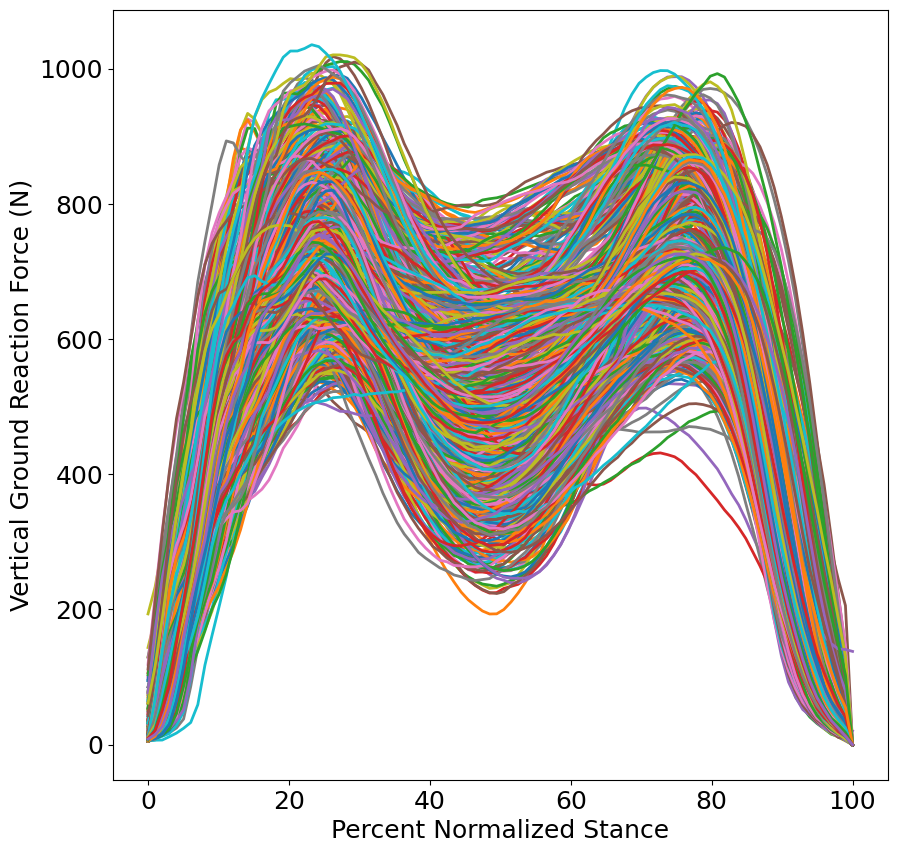

In [64]:
grf_y_resampled = get_all_segments(resampled_segs, 'grf_y')
time_resampled = resampled_segs['time_resampled']
figure = plt.figure(figsize=(10, 10))

num_grf_segments = len(grf_y_resampled)

for i in range(num_grf_segments):
    plt.plot(time_resampled[0] * 100, grf_y_resampled[i], linewidth=2)

plt.ylabel("Vertical Ground Reaction Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.xlim([0, 1])
# plt.ylim([0, 1200])

In [65]:
tibpost_resampled = get_all_segments(resampled_segs, 'tibpost')
tibant_resampled = get_all_segments(resampled_segs, 'tibant')
edl_resampled = get_all_segments(resampled_segs, 'edl')
ehl_resampled = get_all_segments(resampled_segs, 'ehl')
fdl_resampled = get_all_segments(resampled_segs, 'fdl')
fhl_resampled = get_all_segments(resampled_segs, 'fhl')
gaslat_resampled = get_all_segments(resampled_segs, 'gaslat')
gasmed_resampled = get_all_segments(resampled_segs, 'gasmed')
soleus_resampled = get_all_segments(resampled_segs, 'soleus')
perbrev_resampled = get_all_segments(resampled_segs, 'perbrev')
perlong_resampled = get_all_segments(resampled_segs, 'perlong')
achilles_resampled = get_all_segments(resampled_segs, 'achilles')

time_resampled = resampled_segs['time_resampled']

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.,
        4000.]),
 [Text(0, -500.0, '−500'),
  Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500'),
  Text(0, 4000.0, '4000')])

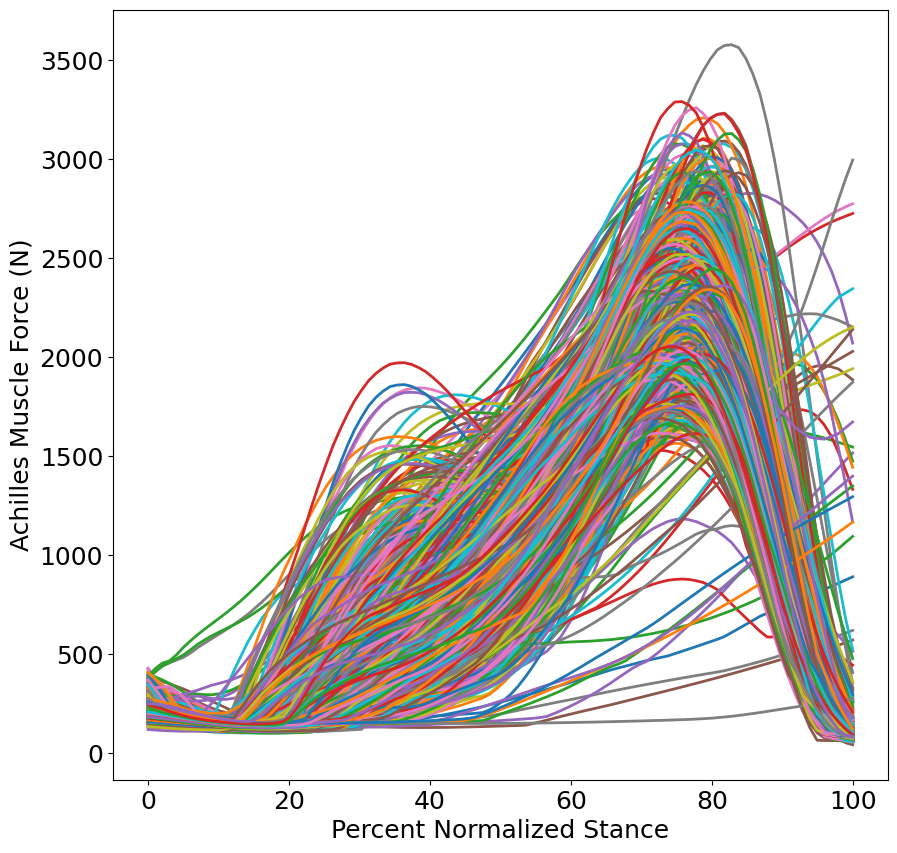

In [66]:
figure = plt.figure(figsize=(10, 10))

num_achilles_segments = len(achilles_resampled)

for i in range(num_achilles_segments):
    plt.plot(time_resampled[0]*100, achilles_resampled[i], linewidth=2)

plt.ylabel("Achilles Muscle Force (N)", fontsize=18)
plt.xlabel("Percent Normalized Stance", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

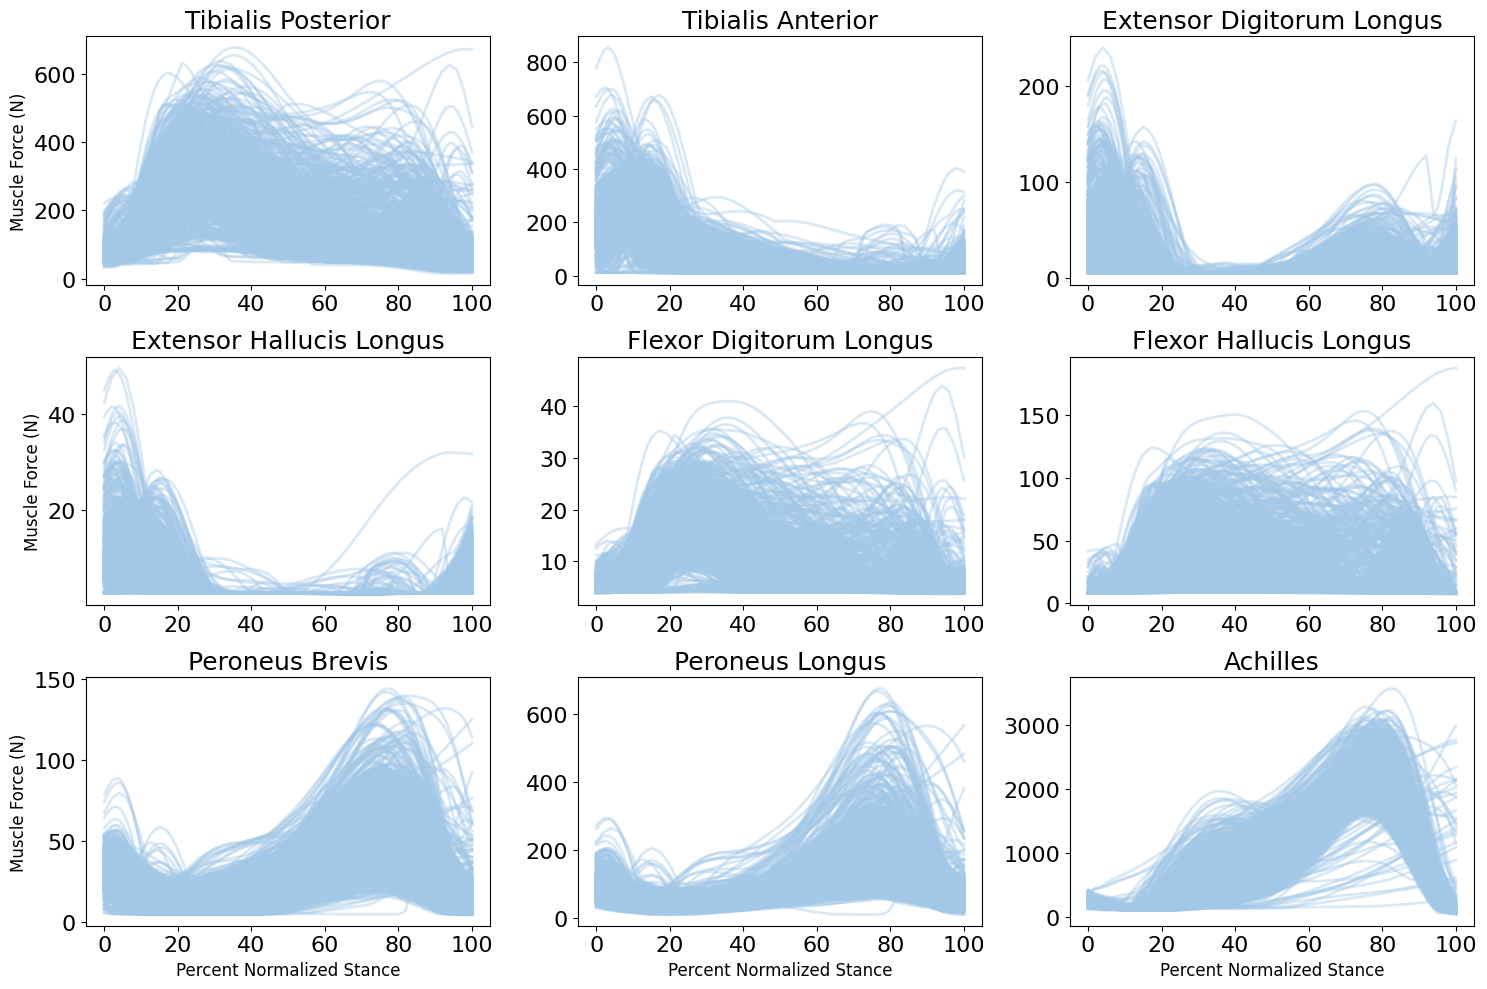

In [67]:
muscle_titles = ['Tibialis Posterior', 'Tibialis Anterior', 'Extensor Digitorum Longus', 'Extensor Hallucis Longus', 
                 'Flexor Digitorum Longus', 'Flexor Hallucis Longus', 'Peroneus Brevis', 'Peroneus Longus', 'Achilles']

perc_stance = np.linspace(0, 100, 100)

muscle_forces = [tibpost_resampled, tibant_resampled, edl_resampled, ehl_resampled, fdl_resampled, fhl_resampled,
                 perbrev_resampled, perlong_resampled, achilles_resampled]

fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create subplots for 9 muscles
axes = axes.flatten()

for i, ax in enumerate(axes):
    for j in range(num_achilles_segments):
        ax.plot(time_resampled[0]*100, muscle_forces[i][j], linewidth=2, color="#A2C7E7", alpha=0.4)
    
    mean_force = ()
    
    if i >= 6:
        ax.set_xlabel('Percent Normalized Stance', fontsize=12)
        
    if i % 3 == 0:
        ax.set_ylabel('Muscle Force (N)', fontsize=12)
        
    ax.set_title(muscle_titles[i], fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

plt.tight_layout()
plt.show()

In [ ]:
tony_dir = '/Users/briankeller/Desktop/GRFMuscleModel/data/'
tony_muscle_data = np.load(tony_dir + 'muscle.npy', mmap_mode='r')
n_y_trials, n_timepoints, n_muscles = tony_muscle_data.shape
tony_muscle_labels = ['tibpost', 'tibant', 'edl', 'ehl', 'fdl', 'fhl', 'perbrev', 'perlong', 'achilles']
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # Create subplots for 9 muscles
axes = axes.flatten()

for i, ax in enumerate(axes):
    for j in range(num_achilles_segments):
        ax.plot(time_resampled[0]*100, muscle_forces[i][j], linewidth=2, color="#A2C7E7", alpha=0.4)
    for k in range(n_y_trials):
         ax.plot(np.linspace(0, 100, n_timepoints), tony_muscle_data[k, :, i], linewidth=2, color="#E7A9A2", alpha=0.01)
    your_mean = np.mean(np.vstack(muscle_forces[i]), axis=0)
    tony_mean = np.mean(tony_muscle_data[:, :, i], axis=0)

    # --- Plot mean lines ---
    ax.plot(
        time_resampled[0] * 100,
        your_mean,
        color="#005A9C",
        linewidth=2.5,
        label='OA mean'
    )
    ax.plot(
        np.linspace(0, 100, n_timepoints),
        tony_mean,
        color="#9C2B00",
        linewidth=2.5,
        label='YA mean'
    )

    # Formatting
    ax.set_title(muscle_titles[i], fontsize=14)
    if i >= 6:
        ax.set_xlabel('Percent Stance (%)', fontsize=12)
    if i % 3 == 0:
        ax.set_ylabel('Force (N)', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)
    ax.grid(True, alpha=0.3)
    
    if i >= 6:
        ax.set_xlabel('Percent Normalized Stance', fontsize=12)
        
    if i % 3 == 0:
        ax.set_ylabel('Muscle Force (N)', fontsize=12)
        
    ax.set_title(muscle_titles[i], fontsize=18)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    ax.legend()

plt.tight_layout()
plt.show()

In [68]:
with open('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Y_muscle_forces_stats_100.txt', "w") as file:
    for i, muscle in enumerate(muscle_titles):
        all_forces = np.concatenate(muscle_forces[i])
        # max_val = np.max(all_forces)
        # min_val = np.min(all_forces)
        max_vals = [np.max(seg) for seg in muscle_forces[i]]
        max_mean = np.mean(max_vals)
        max_std = np.std(max_vals)
        
        min_vals = [np.min(seg) for seg in muscle_forces[i]]
        min_mean = np.mean(min_vals)
        min_std = np.std(min_vals)
        
        mean_val = np.mean(all_forces)
        std_val = np.std(all_forces)
        
        print(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n")
        file.write(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n\n")

Tibialis Posterior:
 Mean Max = 335.91
 Std Max = 110.63
 Mean Min = 63.11
 Std Min = 17.32
 Mean = 174.54
 Std = 115.13

Tibialis Anterior:
 Mean Max = 305.32
 Std Max = 103.74
 Mean Min = 10.84
 Std Min = 4.78
 Mean = 73.46
 Std = 95.20

Extensor Digitorum Longus:
 Mean Max = 69.58
 Std Max = 35.20
 Mean Min = 5.57
 Std Min = 0.16
 Mean = 14.94
 Std = 20.61

Extensor Hallucis Longus:
 Mean Max = 15.77
 Std Max = 6.02
 Mean Min = 2.68
 Std Min = 0.04
 Mean = 4.51
 Std = 4.10

Flexor Digitorum Longus:
 Mean Max = 18.98
 Std Max = 6.56
 Mean Min = 4.26
 Std Min = 0.59
 Mean = 9.71
 Std = 6.49

Flexor Hallucis Longus:
 Mean Max = 62.62
 Std Max = 28.33
 Mean Min = 8.48
 Std Min = 0.44
 Mean = 28.36
 Std = 26.36

Peroneus Brevis:
 Mean Max = 61.75
 Std Max = 24.74
 Mean Min = 7.93
 Std Min = 4.11
 Mean = 28.53
 Std = 21.85

Peroneus Longus:
 Mean Max = 212.74
 Std Max = 116.19
 Mean Min = 32.22
 Std Min = 12.87
 Mean = 95.34
 Std = 78.87

Achilles:
 Mean Max = 2294.40
 Std Max = 403.88
 M

In [69]:
with open('/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Y_muscle_forces_stats_25.txt', "w") as file:
    for i, muscle in enumerate(muscle_titles):
        all_forces = np.concatenate(muscle_forces[i])
        # max_val = np.max(all_forces)
        # min_val = np.min(all_forces)
        max_vals = [np.max(seg) for seg in muscle_forces[i]]
        max_mean = np.mean(max_vals) / 4
        max_std = np.std(max_vals) / 4
        
        min_vals = [np.min(seg) for seg in muscle_forces[i]]
        min_mean = np.mean(min_vals) / 4
        min_std = np.std(min_vals) / 4
        
        mean_val = np.mean(all_forces) / 4
        std_val = np.std(all_forces) / 4
        
        print(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n")
        file.write(f"{muscle}:\n Mean Max = {max_mean:.2f}\n Std Max = {max_std:.2f}\n Mean Min = {min_mean:.2f}\n Std Min = {min_std:.2f}\n Mean = {mean_val:.2f}\n Std = {std_val:.2f}\n\n")

Tibialis Posterior:
 Mean Max = 83.98
 Std Max = 27.66
 Mean Min = 15.78
 Std Min = 4.33
 Mean = 43.63
 Std = 28.78

Tibialis Anterior:
 Mean Max = 76.33
 Std Max = 25.93
 Mean Min = 2.71
 Std Min = 1.20
 Mean = 18.37
 Std = 23.80

Extensor Digitorum Longus:
 Mean Max = 17.40
 Std Max = 8.80
 Mean Min = 1.39
 Std Min = 0.04
 Mean = 3.73
 Std = 5.15

Extensor Hallucis Longus:
 Mean Max = 3.94
 Std Max = 1.50
 Mean Min = 0.67
 Std Min = 0.01
 Mean = 1.13
 Std = 1.03

Flexor Digitorum Longus:
 Mean Max = 4.75
 Std Max = 1.64
 Mean Min = 1.06
 Std Min = 0.15
 Mean = 2.43
 Std = 1.62

Flexor Hallucis Longus:
 Mean Max = 15.66
 Std Max = 7.08
 Mean Min = 2.12
 Std Min = 0.11
 Mean = 7.09
 Std = 6.59

Peroneus Brevis:
 Mean Max = 15.44
 Std Max = 6.18
 Mean Min = 1.98
 Std Min = 1.03
 Mean = 7.13
 Std = 5.46

Peroneus Longus:
 Mean Max = 53.18
 Std Max = 29.05
 Mean Min = 8.05
 Std Min = 3.22
 Mean = 23.84
 Std = 19.72

Achilles:
 Mean Max = 573.60
 Std Max = 100.97
 Mean Min = 23.97
 Std Min

In [70]:
export_path = '/Users/briankeller/Desktop/GRFMuscleModel/Old_Young_Walking_Data/Y_resampled_compiled_segments'
with open(export_path, 'wb') as f:
    pickle.dump(resampled_segs, f)